# 02582 Computational Data Analysis - Case 2

**Group 16 - members**:
- Anastasia Maftei: s226765
- Beatriz Braga De Carvalho: s233576
- Raquel Moleiro Marques: s243636
- Sree Keerthi Desu: s243933

___________

### Imports

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

________

## Load data

In [4]:
data = pd.read_csv('data/HR_data.csv')
data.head()

,Unnamed: 0,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,...,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,0,78.663878,76.70,7.480043,67.25,92.48,23048.450,-1.091448,0.369955,-0.7300,...,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,1,76.540732,76.61,2.584756,69.82,82.33,23959.920,-0.245338,0.338732,-0.3600,...,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
2,2,78.173563,77.92,2.681255,72.22,82.80,20324.605,-0.615922,-0.233047,-0.6300,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
3,3,83.073688,83.88,7.363598,69.42,96.12,24924.300,-0.866610,-0.046021,-0.4650,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
4,4,72.281250,72.91,3.193762,64.95,79.98,23052.100,0.200401,-0.560948,-0.3725,...,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0


In [5]:
data.columns

Index(['Unnamed: 0', 'HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min',
       'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
       'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_R

In [6]:
# Remove the first column
data = data.drop(columns=['Unnamed: 0'])

In [7]:
data.info() # Detailed information on features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 67 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HR_TD_Mean           312 non-null    float64
 1   HR_TD_Median         312 non-null    float64
 2   HR_TD_std            312 non-null    float64
 3   HR_TD_Min            312 non-null    float64
 4   HR_TD_Max            312 non-null    float64
 5   HR_TD_AUC            312 non-null    float64
 6   HR_TD_Kurtosis       312 non-null    float64
 7   HR_TD_Skew           312 non-null    float64
 8   HR_TD_Slope_min      312 non-null    float64
 9   HR_TD_Slope_max      312 non-null    float64
 10  HR_TD_Slope_mean     312 non-null    float64
 11  HR_TD_Slope          312 non-null    float64
 12  TEMP_TD_Mean         312 non-null    float64
 13  TEMP_TD_Median       312 non-null    float64
 14  TEMP_TD_std          312 non-null    float64
 15  TEMP_TD_Min          312 non-null    flo

In [8]:
# Check for missing values
# print vars that have missing values and their counts
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values:\n", missing_values)

Missing values:
 EDA_TD_P_RT     1
EDA_TD_P_ReT    1
inspired        2
attentive       1
afraid          1
active          1
determined      2
dtype: int64


In [9]:
id_columns = ['Round', 'Phase', 'Individual', 'Puzzler', 'Cohort']

In [10]:
# Extract questionnaire data
questionnaire = data[[col for col in data.columns if 'EDA_' not in col if 'TEMP_' not in col if 'HR_' not in col]].copy()

# Extract numerical data
numerical = data[[col for col in data.columns if 'EDA_' in col or 'TEMP_' in col or 'HR_' in col or col in col in id_columns ]].copy()

In [11]:
# Extract individual time domain signal measures
heart_rate = pd.concat([data[id_columns], data[[col for col in data.columns if 'HR_TD_' in col]]], axis=1)
temperature = pd.concat([data[id_columns], data[[col for col in data.columns if 'TEMP_TD_' in col]]], axis=1)
eda_phasic = pd.concat([data[id_columns], data[[col for col in data.columns if 'EDA_TD_P_' in col]]], axis=1)
# ^ also has reaction tie, peaks, and rise time
eda_tonic = pd.concat([data[id_columns], data[[col for col in data.columns if 'EDA_TD_T_' in col]]], axis=1)

__________

# Preliminary analysis

In [12]:
# Generate histograms
def hist_subplots(dataset, id_columns, fig=None):

    # Get relevant features
    rel_features = [col for col in dataset.columns if col not in id_columns]

    # Plot distribution of each feature
    if fig is None:
        fig = plt.figure(figsize=(20, 40))
    for i, col in enumerate(rel_features):
        plt.subplot(15, 4, i + 1)
        sns.histplot(dataset[col], kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()

In [13]:
# Generate correlation matrix
def corr_heatmap(dataset, id_columns):

    # Get relevant features
    rel_features = [col for col in dataset.columns if col not in id_columns]

    # Subset with only relevant features
    subset = dataset[rel_features]

    # Triangular correlation matrix
    mask = np.triu(np.ones_like(subset.corr(), dtype=bool))

    # Correlation heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(subset.corr(), mask=mask, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1)
    plt.title('Correlation matrix')
    plt.show()

## Numerical data
### Heart rate

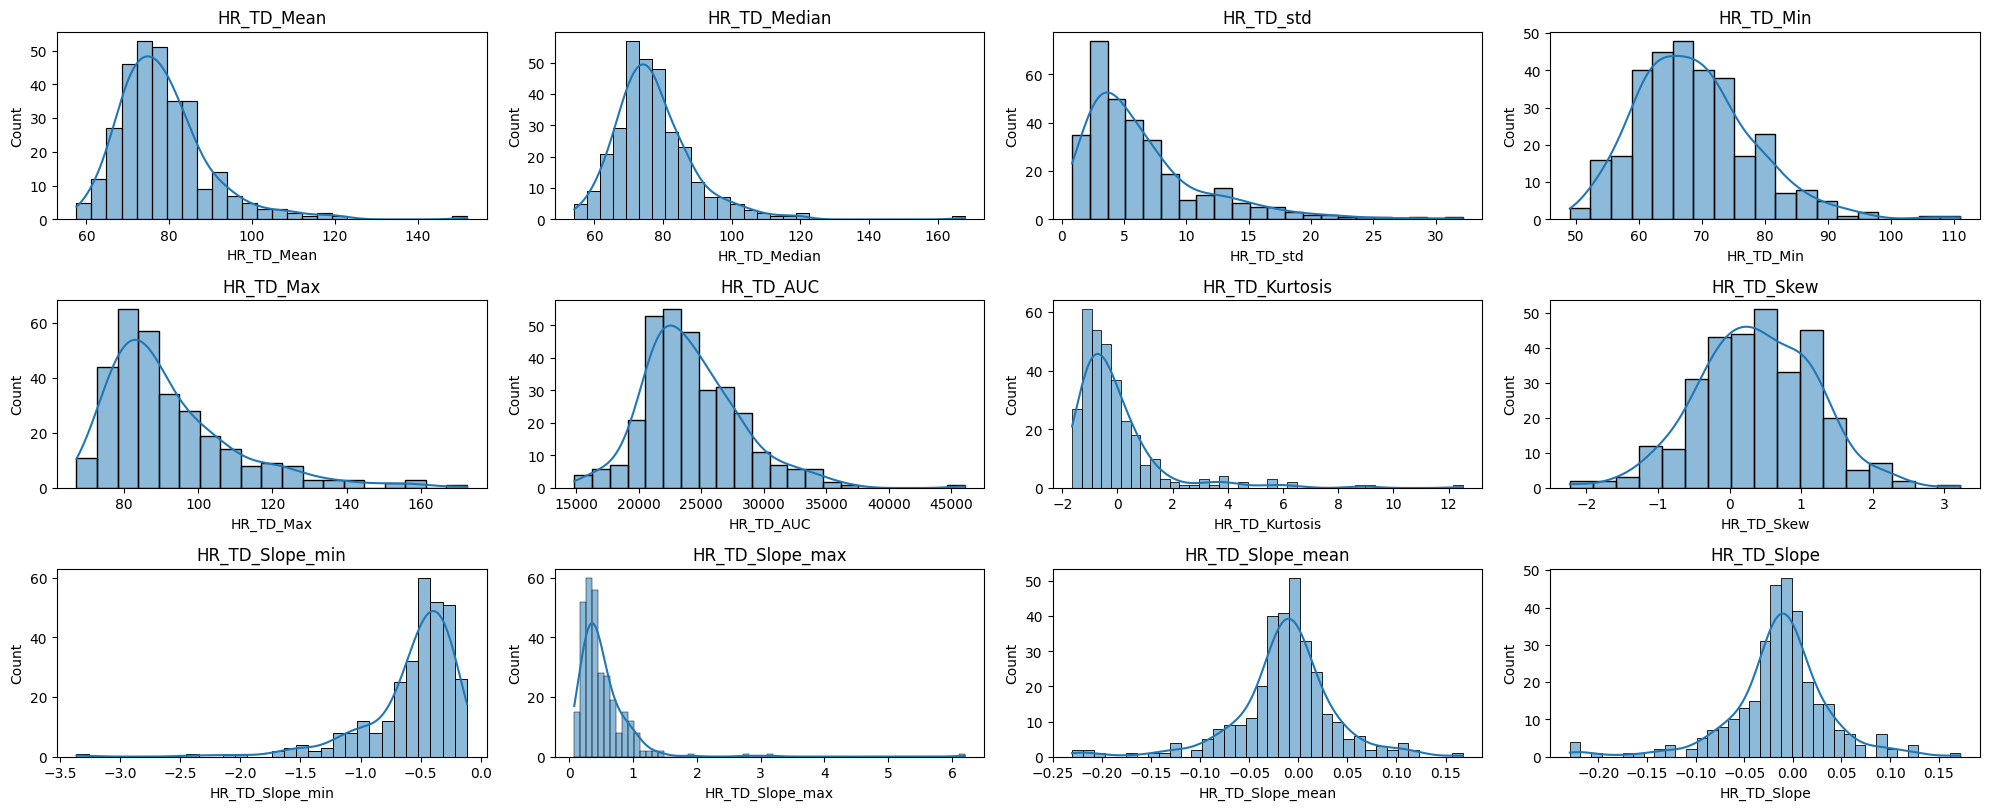

In [14]:
hist_subplots(heart_rate, id_columns)

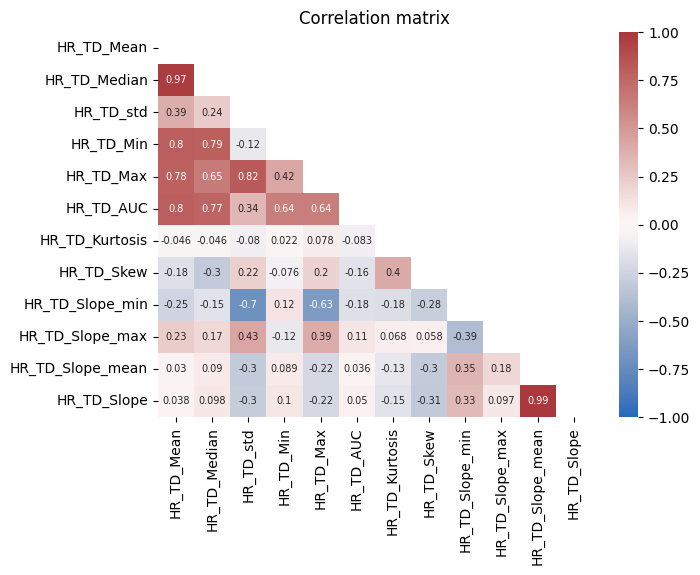

In [15]:
corr_heatmap(heart_rate, id_columns)

### Temperature

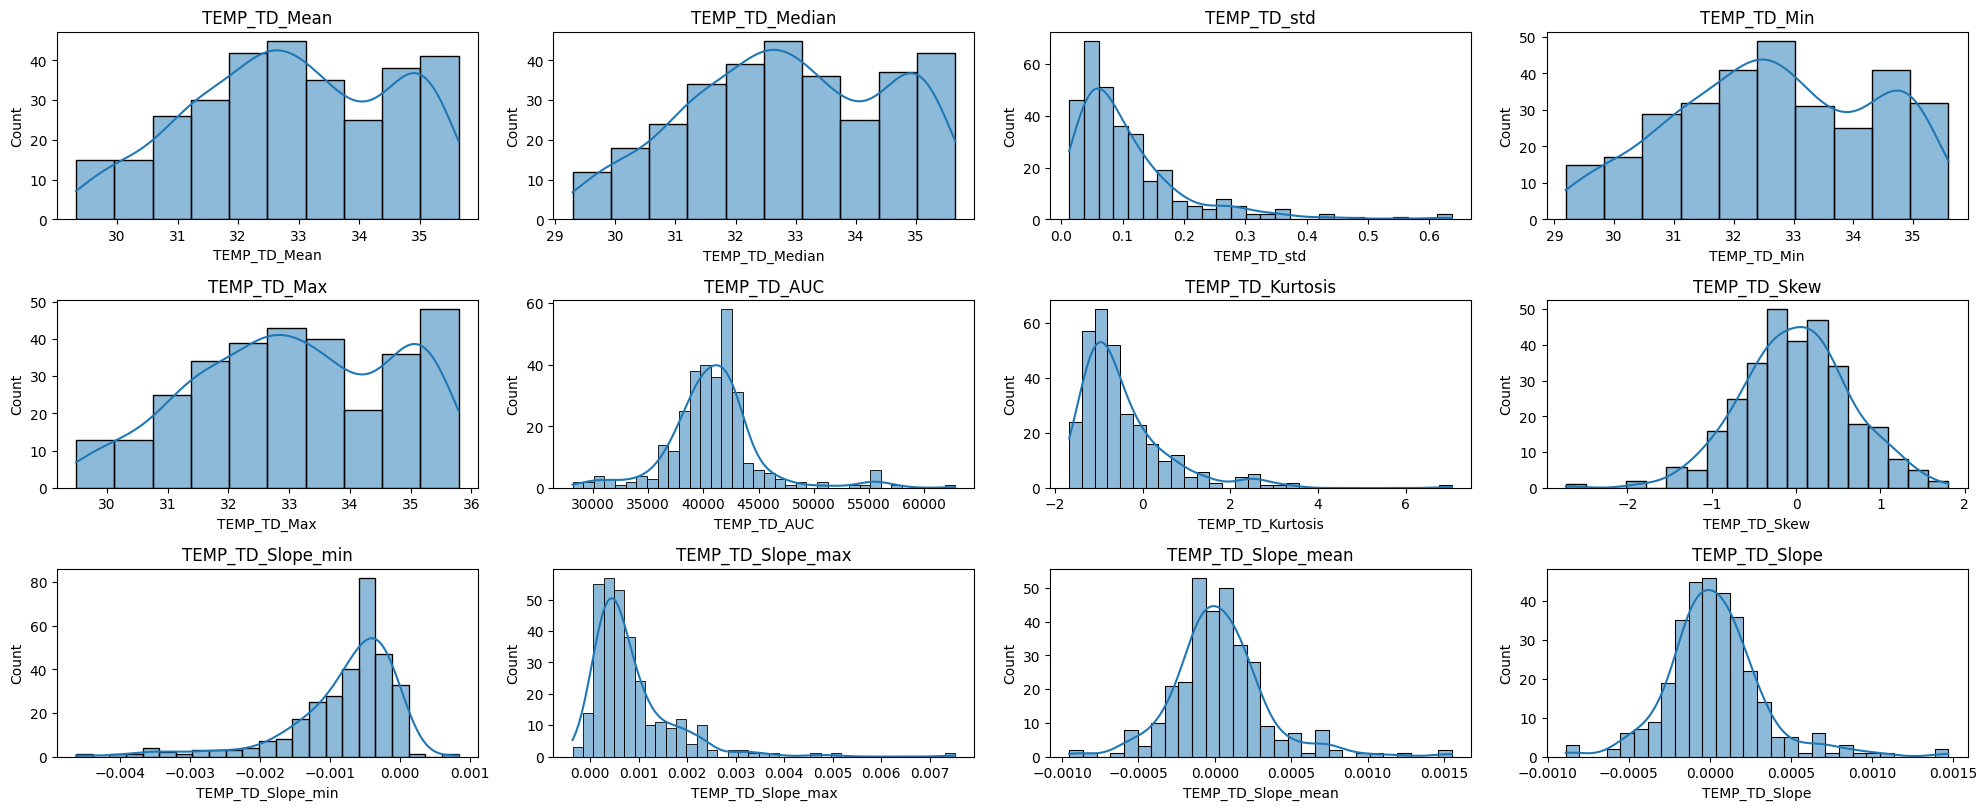

In [16]:
hist_subplots(temperature, id_columns)

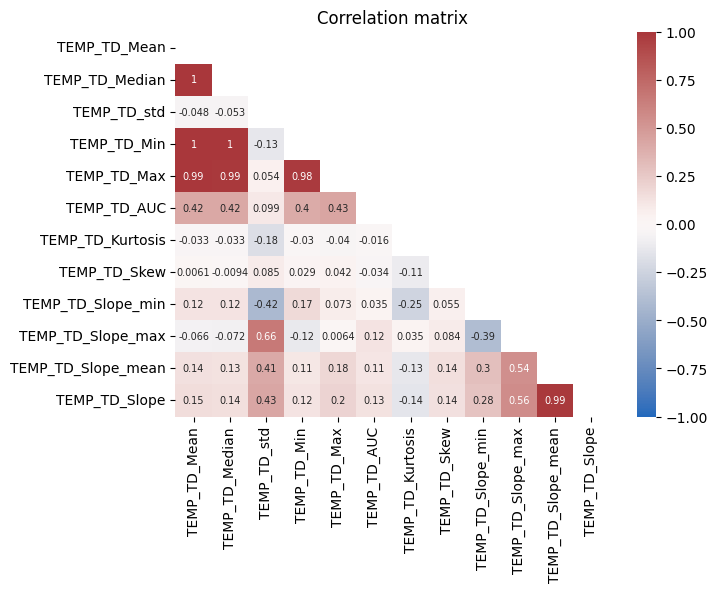

In [17]:
corr_heatmap(temperature, id_columns)

### EDA Phasic

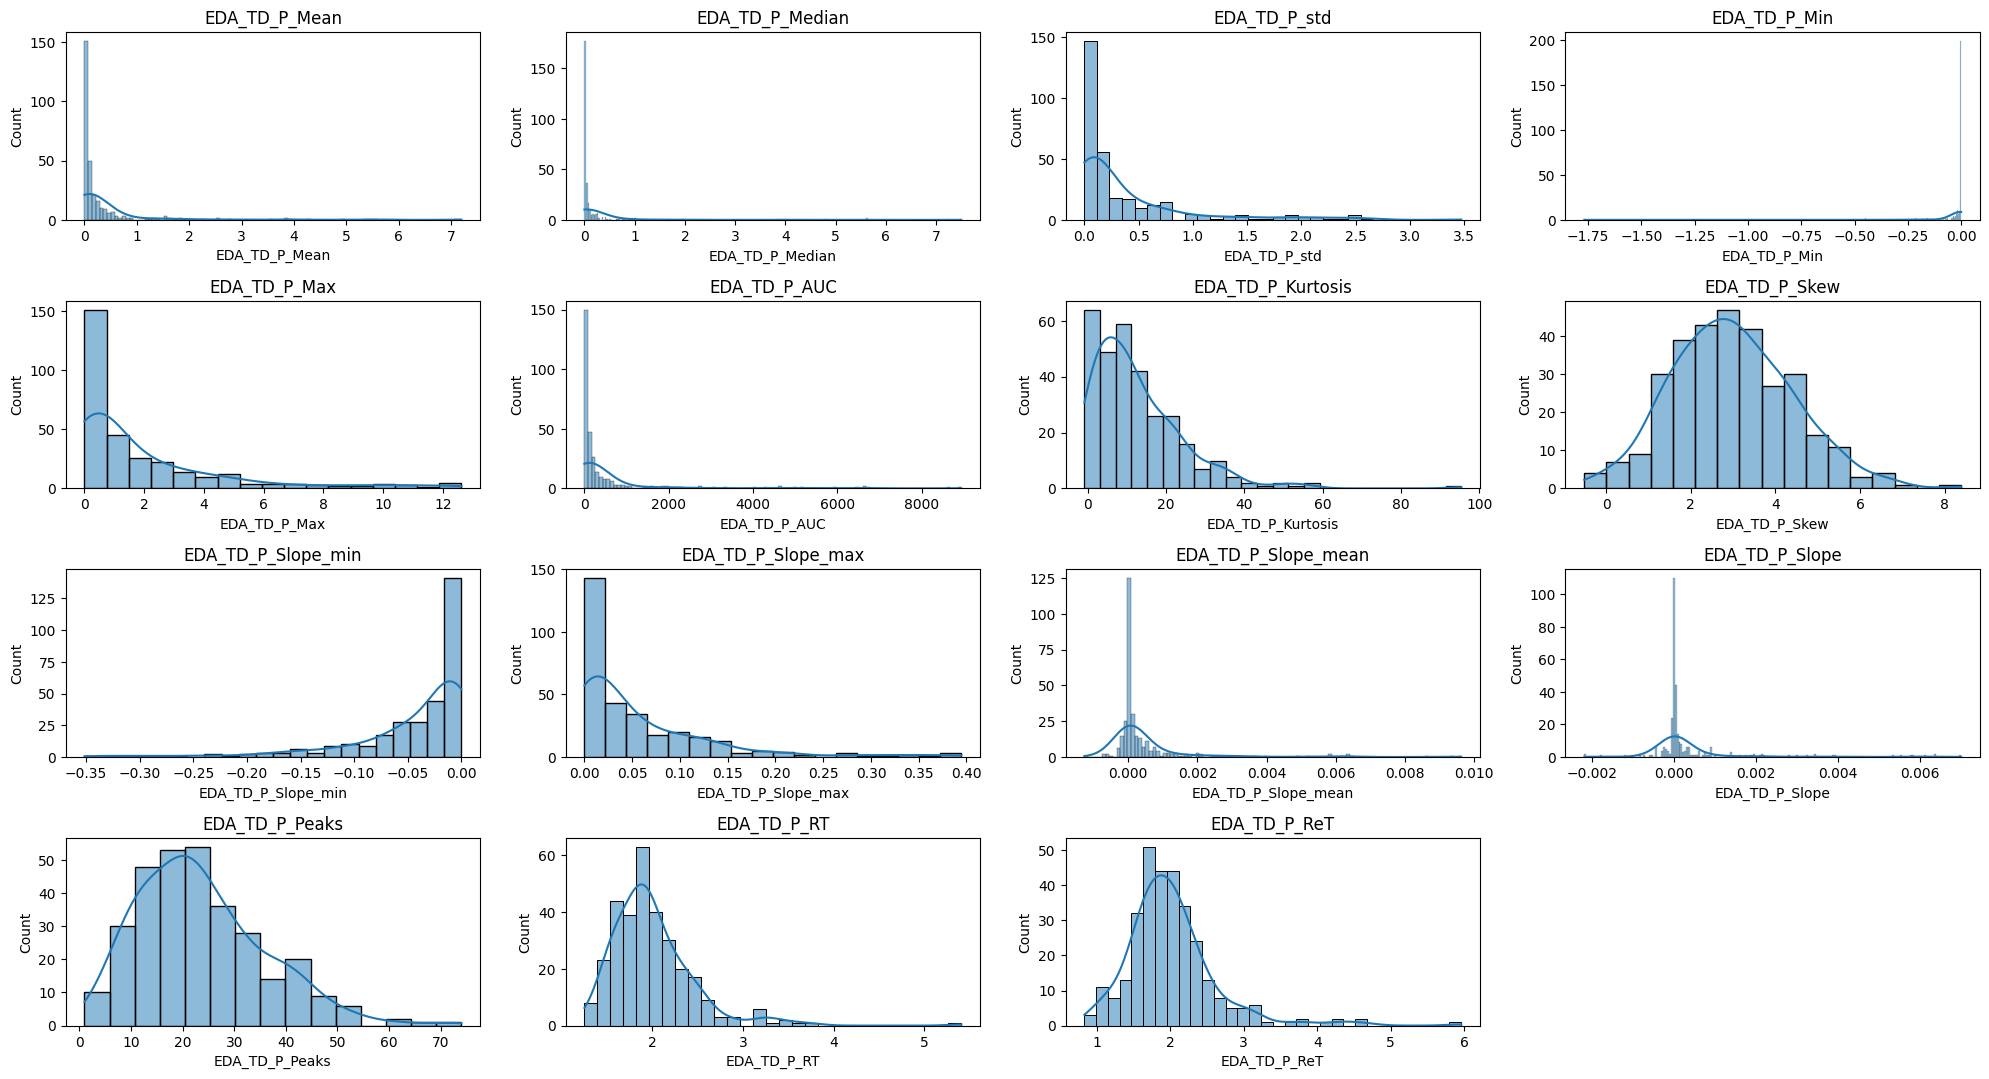

In [18]:
hist_subplots(eda_phasic, id_columns)

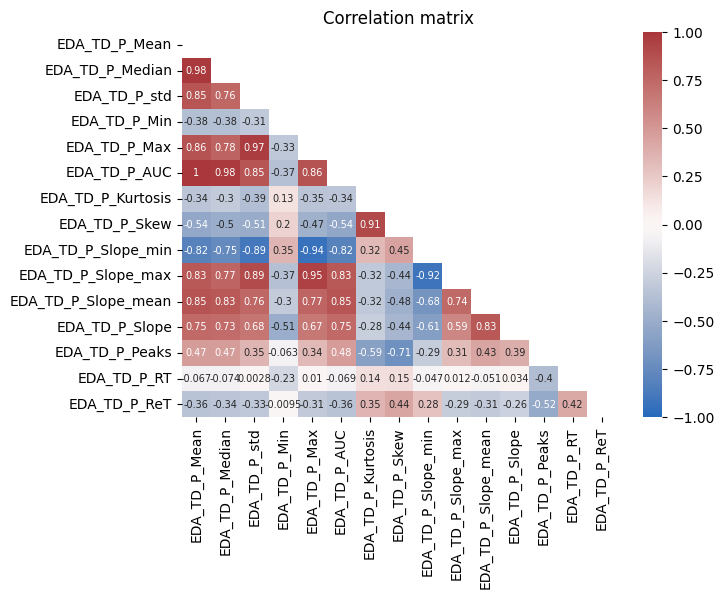

In [19]:
corr_heatmap(eda_phasic, id_columns)

### EDA Tonic

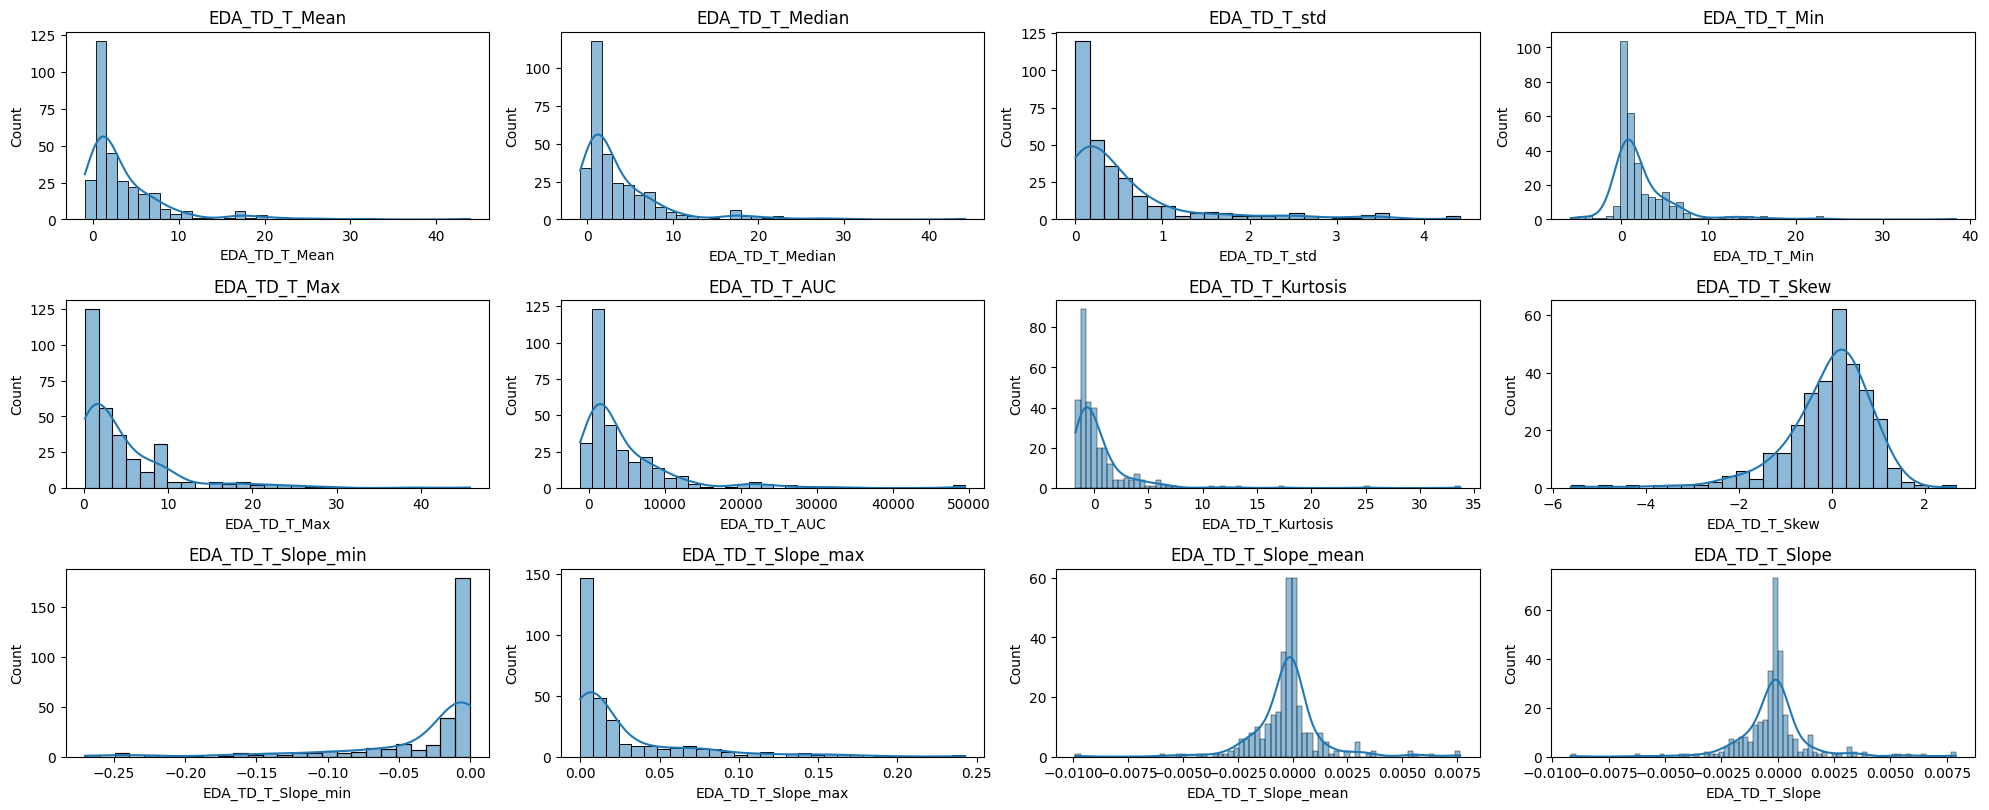

In [20]:
hist_subplots(eda_tonic, id_columns)

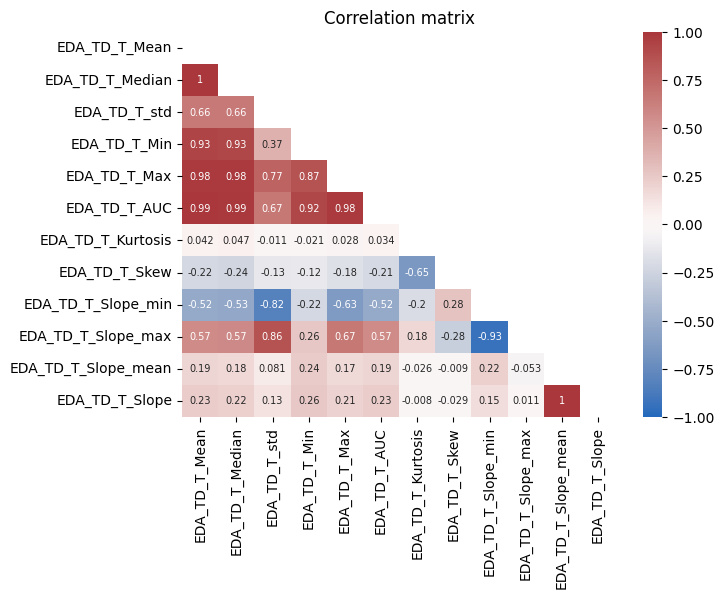

In [21]:
corr_heatmap(eda_tonic, id_columns)

## Questionnaire data

In [22]:
questionnaire_features = [col for col in questionnaire.columns if col not in id_columns]

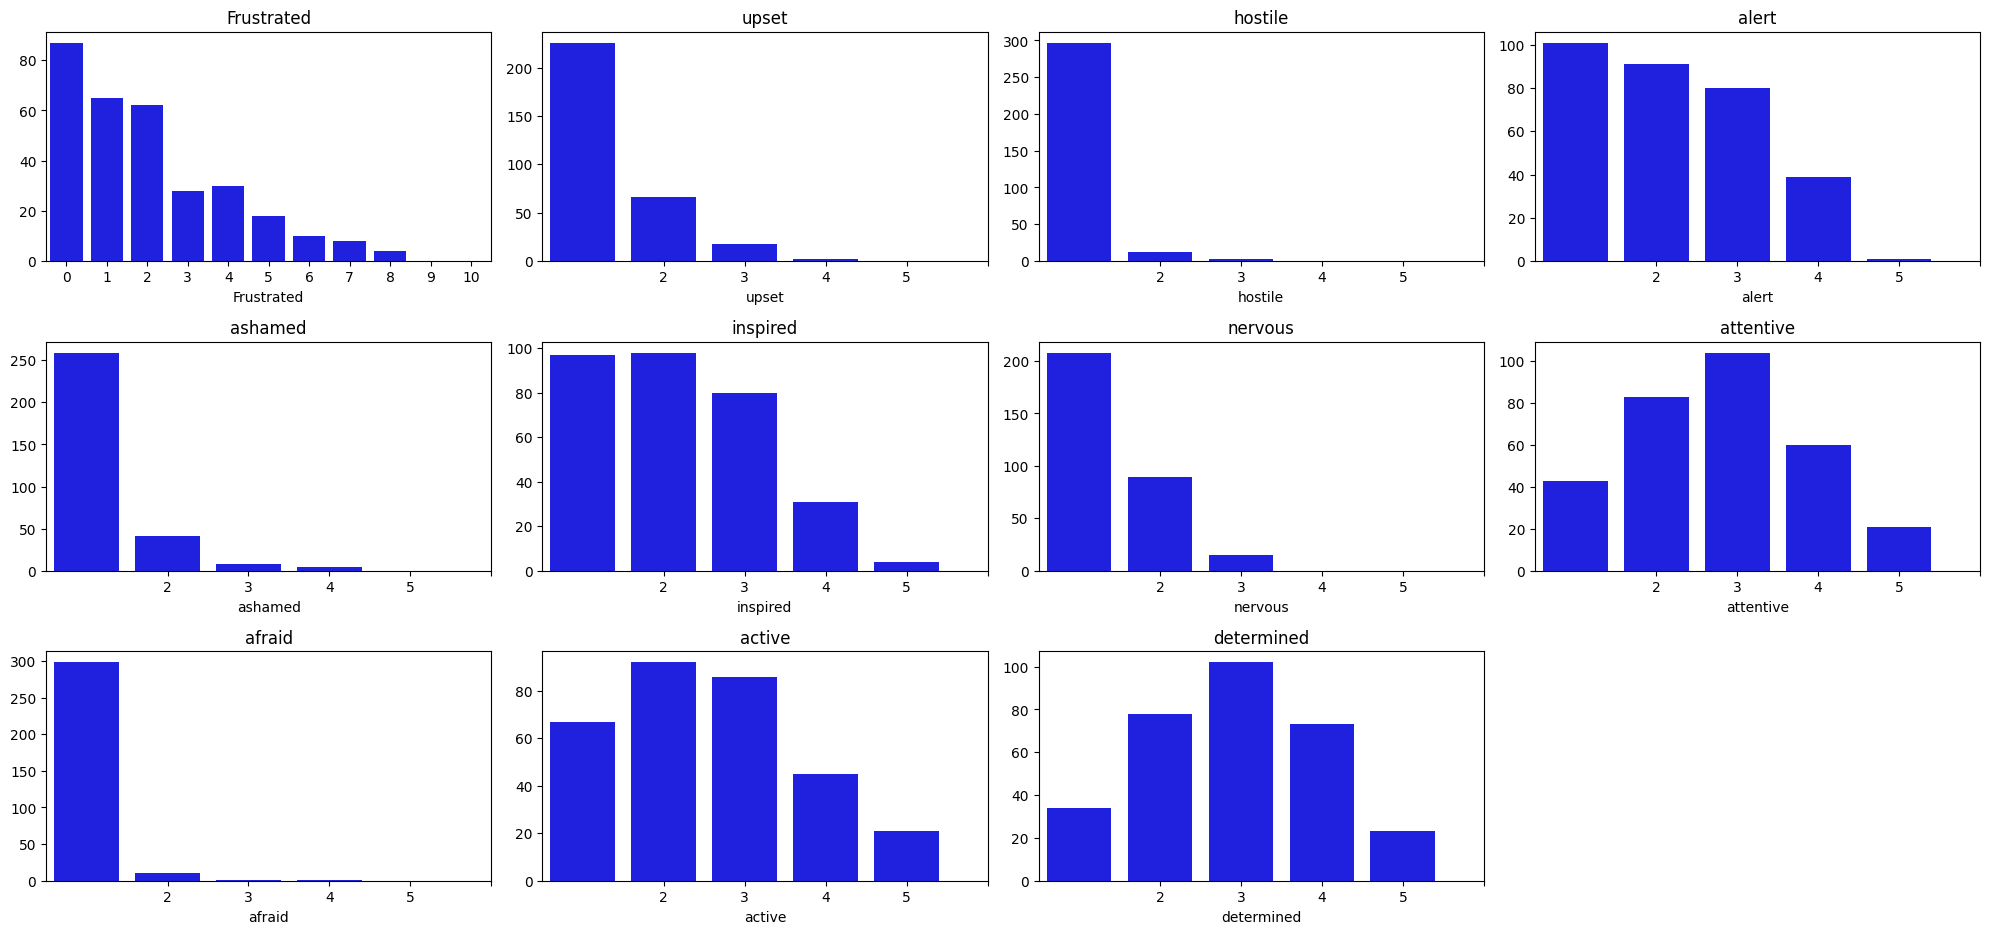

In [23]:
# Plot distribution of each feature
plt.figure(figsize=(20, 40))
for i, col in enumerate(questionnaire_features):
    plt.subplot(13, 4, i + 1)
    if col.lower() == 'frustrated':
        full_range = list(range(0, 11))  # 0 to 10 for frustration
    else:
        full_range = list(range(1, 6))   # 1 to 5 for all others
    value_counts = questionnaire[col].value_counts().reindex(full_range, fill_value=0)
    sns.barplot(x=value_counts.index, y=value_counts.values, color='blue')
    plt.title(col)
    plt.xticks(full_range)  # ensure all x values are shown
plt.tight_layout()
plt.show()

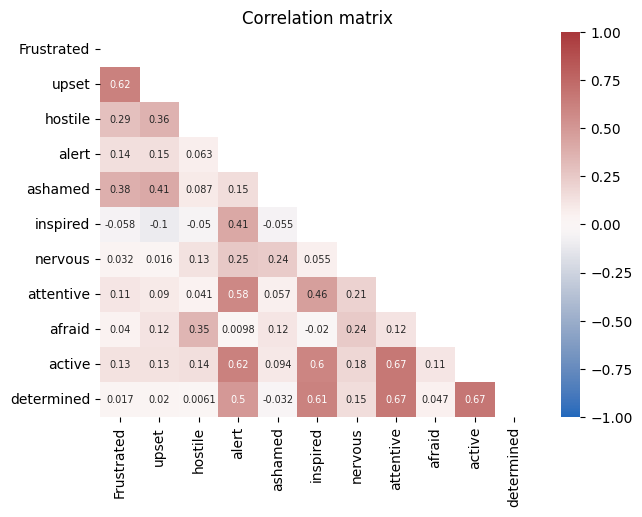

In [24]:
# Subset with only relevant features
questionnaire_subset = questionnaire[questionnaire_features]

# Triangular correlation matrix
mask = np.triu(np.ones_like(questionnaire_subset.corr(), dtype=bool))

# Correlation heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(questionnaire_subset.corr(), mask=mask, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

__________

## Preprocess data

In [25]:
# List of columns to remove (questionnaire + ID columns will be re-added manually in front)
remove_columns = questionnaire_features + id_columns

# Keep only the physiological features
features = [col for col in data.columns if col not in remove_columns]

# Arrange the final DataFrame with ID columns first
final_data = data[id_columns + features]
final_data.head()

,Round,Phase,Individual,Puzzler,Cohort,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,...,EDA_TD_T_AUC,EDA_TD_T_Kurtosis,EDA_TD_T_Skew,EDA_TD_T_Slope_min,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT
0,round_3,phase3,1,1,D1_4,78.663878,76.70,7.480043,67.25,92.48,...,213.374114,1.345997,-1.379434,-0.000144,0.000138,0.000010,1.036040e-05,11,2.522727,2.075000
1,round_3,phase2,1,1,D1_4,76.540732,76.61,2.584756,69.82,82.33,...,213.235380,0.887010,0.854067,-0.000146,0.000165,0.000009,7.714503e-06,15,2.214286,2.192308
2,round_3,phase1,1,1,D1_4,78.173563,77.92,2.681255,72.22,82.80,...,173.465157,0.205817,0.480581,-0.000112,0.000132,0.000002,1.799914e-06,10,1.972222,2.111111
3,round_2,phase3,1,1,D1_4,83.073688,83.88,7.363598,69.42,96.12,...,191.943390,2.488339,1.246665,-0.000455,0.000481,-0.000001,-1.355151e-07,12,1.886364,1.805556
4,round_2,phase2,1,1,D1_4,72.281250,72.91,3.193762,64.95,79.98,...,192.341180,1.196508,1.592099,-0.000420,0.000334,0.000014,1.267198e-05,20,1.812500,1.926471


# Standardizing the features

In [26]:
# Separate features from IDs
X = final_data.drop(columns=id_columns)  # Only physiological features

# Standardize the features to make fair comparison
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to a DataFrame (for readability and linking back to IDs)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Re-attach ID columns
standardized_data = pd.concat([final_data[id_columns].reset_index(drop=True), X_scaled_df], axis=1)
standardized_data.head()

,Round,Phase,Individual,Puzzler,Cohort,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,...,EDA_TD_T_AUC,EDA_TD_T_Kurtosis,EDA_TD_T_Skew,EDA_TD_T_Slope_min,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT
0,round_3,phase3,1,1,D1_4,0.010023,-0.062352,0.187214,-0.163880,0.001629,...,-0.674626,0.276417,-1.310763,0.595726,-0.667286,0.135978,0.096659,-1.012991,1.132105,0.099199
1,round_3,phase2,1,1,D1_4,-0.176801,-0.069806,-0.793634,0.111690,-0.570809,...,-0.674647,0.136077,0.945391,0.595677,-0.666593,0.135187,0.095006,-0.689332,0.466269,0.289742
2,round_3,phase1,1,1,D1_4,-0.033122,0.038688,-0.774299,0.369032,-0.544302,...,-0.680703,-0.072207,0.568117,0.596330,-0.667436,0.130645,0.091310,-1.093906,-0.056276,0.157854
3,round_2,phase3,1,1,D1_4,0.398059,0.532294,0.163883,0.068800,0.206917,...,-0.677889,0.625703,1.341971,0.589771,-0.658566,0.129049,0.090101,-0.932077,-0.241620,-0.338459
4,round_2,phase2,1,1,D1_4,-0.551609,-0.376240,-0.671610,-0.410499,-0.703343,...,-0.677829,0.230709,1.690908,0.590443,-0.662295,0.138101,0.098103,-0.284758,-0.401070,-0.142057


In [27]:
phase2_data = final_data[final_data["Phase"] == "phase2"]

__________

In [28]:
phase2_standardized = standardized_data[standardized_data["Phase"] == "phase2"]

In [29]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(phase2_standardized[features])

# Step 2: Reduce dimensions with PCA (2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

/Users/raquel/opt/anaconda3/envs/SYP_group17/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/raquel/opt/anaconda3/envs/SYP_group17/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/raquel/opt/anaconda3/envs/SYP_group17/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/raquel/opt/anaconda3/envs/SYP_group17/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

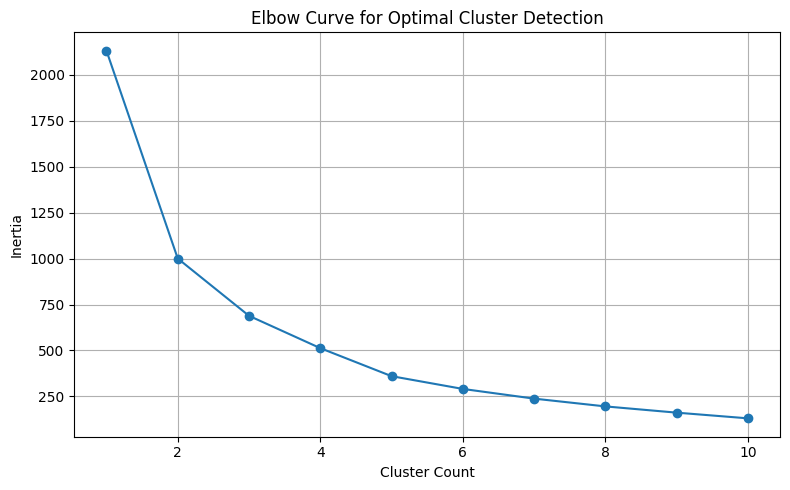

In [30]:
# We'll test a range from 1 to 10 (though we won’t highlight specific k)
k_range = range(1, 11)
inertia_clean = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia_clean.append(kmeans.inertia_)

# Plot only the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_clean, marker='o')
plt.title("Elbow Curve for Optimal Cluster Detection")
plt.xlabel("Cluster Count")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()

/Users/raquel/opt/anaconda3/envs/SYP_group17/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


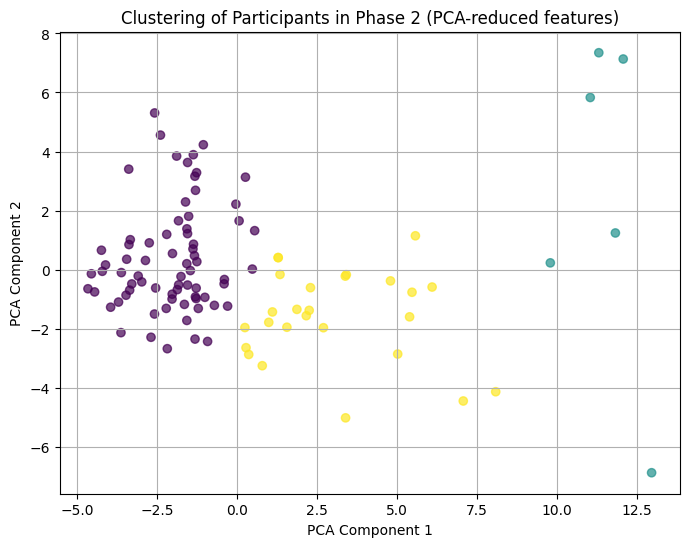

In [32]:
task_data = final_data[final_data["Phase"] == "phase2"]

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(phase2_data[features])

# Step 2: Reduce dimensions with PCA (2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Apply KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add PCA and cluster info back to the DataFrame
phase2_data = phase2_data.copy()
phase2_data["PCA1"] = X_pca[:, 0]
phase2_data["PCA2"] = X_pca[:, 1]
phase2_data["Cluster"] = clusters

# Step 4: Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(phase2_data["PCA1"], phase2_data["PCA2"], c=clusters, cmap="viridis", alpha=0.7)
plt.title("Clustering of Participants in Phase 2 (PCA-reduced features)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [33]:
# Group by cluster and compute the mean of all physiological features
cluster_summary = phase2_data.groupby("Cluster")[features].mean().T

# Print the whole cluster summary
#print("\nFull Cluster-wise Mean Physiological Features:")
#print(cluster_summary)

# Show just key stress-related metrics
stress_indicators = [
    "HR_TD_Mean", "HR_TD_std", "EDA_TD_P_Peaks", "EDA_TD_P_AUC",
    "EDA_TD_P_Slope", "EDA_TD_P_Max","EDA_TD_T_AUC", "EDA_TD_T_Max","TEMP_TD_Mean", "TEMP_TD_std"
]

print("\nKey Stress Indicators by Cluster:")
print(cluster_summary.loc[stress_indicators])


Key Stress Indicators by Cluster:
Cluster                   0             1            2
HR_TD_Mean        79.635228     82.612919    79.692913
HR_TD_std          6.940223      7.928647     5.304716
EDA_TD_P_Peaks    29.972222     52.333333    34.461538
EDA_TD_P_AUC     130.736918   6280.332976  1196.744868
EDA_TD_P_Slope     0.000171      0.003671     0.000683
EDA_TD_P_Max       0.803723     10.981521     4.423240
EDA_TD_T_AUC    1853.178878  15230.710646  8745.872016
EDA_TD_T_Max       1.918499     17.129532     9.064891
TEMP_TD_Mean      32.225161     34.786629    34.545737
TEMP_TD_std        0.092697      0.091344     0.063770


In [38]:
# Map the clusters to stress levels based on physiological profiles
cluster_to_stress = {
    0: 0,  # Not Stressed
    1: 2,  # Very Stressed
    2: 1   # Moderately Stressed
}

phase2_data["StressLevel"] = phase2_data["Cluster"].map(cluster_to_stress)
phase2_data

,Round,Phase,Individual,Puzzler,Cohort,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,...,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT,PCA1,PCA2,Cluster,StressLevel
1,round_3,phase2,1,1,D1_4,76.540732,76.61,2.584756,69.82,82.33,...,0.000165,0.000009,0.000008,15,2.214286,2.192308,-4.216715,-0.057849,0,0
4,round_2,phase2,1,1,D1_4,72.281250,72.91,3.193762,64.95,79.98,...,0.000334,0.000014,0.000013,20,1.812500,1.926471,-4.456451,-0.756338,0,0
7,round_4,phase2,1,1,D1_4,76.542762,75.58,5.519411,66.88,85.70,...,0.000574,-0.000003,-0.000003,15,1.928571,1.910714,-4.664734,-0.649415,0,0
10,round_1,phase2,1,1,D1_4,73.961289,71.53,5.500071,67.37,87.83,...,0.000278,0.000006,0.000006,17,1.794118,2.178571,-4.243312,0.656030,0,0
13,round_3,phase2,2,0,D1_4,77.586134,76.67,6.282746,66.15,89.37,...,0.010980,-0.000464,-0.000443,23,1.931818,2.053571,-1.573073,0.199266,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,round_1,phase2,25,0,D1_5,66.570189,62.91,8.919428,54.48,86.28,...,0.020200,-0.000862,-0.000708,20,1.960526,2.397059,-1.869896,-0.678562,0,0
301,round_3,phase2,26,1,D1_5,108.283258,106.63,11.525887,89.17,126.08,...,0.013757,0.000251,0.000243,14,1.923077,2.295455,-2.396827,4.556655,0,0
304,round_2,phase2,26,1,D1_5,96.442981,94.03,8.628120,79.02,111.40,...,0.030253,0.001578,0.001478,47,1.808511,1.592857,0.261562,3.131200,0,0
307,round_4,phase2,26,1,D1_5,82.019065,78.83,8.794206,69.73,97.18,...,0.026962,0.001028,0.001032,22,1.829545,1.680556,-1.363076,0.859511,0,0


## Match stress levels with self-reported emotional data

In [49]:
# Step 2: Merge based on Round, Phase, and Individual
merged_data = pd.merge(
    phase2_data,
    questionnaire,
    on=["Round", "Phase", "Individual", "Puzzler"],
    suffixes=("_physio", "_selfreport")
)
merged_data

,Round,Phase,Individual,Puzzler,Cohort_physio,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,...,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,round_3,phase2,1,1,D1_4,76.540732,76.61,2.584756,69.82,82.33,...,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
1,round_2,phase2,1,1,D1_4,72.281250,72.91,3.193762,64.95,79.98,...,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0
2,round_4,phase2,1,1,D1_4,76.542762,75.58,5.519411,66.88,85.70,...,1.0,1.0,2.0,1.0,3.0,2.0,4.0,1.0,3.0,3.0
3,round_1,phase2,1,1,D1_4,73.961289,71.53,5.500071,67.37,87.83,...,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0
4,round_3,phase2,2,0,D1_4,77.586134,76.67,6.282746,66.15,89.37,...,1.0,1.0,1.0,1.0,3.0,1.0,4.0,1.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,round_1,phase2,25,0,D1_5,66.570189,62.91,8.919428,54.48,86.28,...,1.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,3.0,3.0
100,round_3,phase2,26,1,D1_5,108.283258,106.63,11.525887,89.17,126.08,...,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0
101,round_2,phase2,26,1,D1_5,96.442981,94.03,8.628120,79.02,111.40,...,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,3.0,2.0
102,round_4,phase2,26,1,D1_5,82.019065,78.83,8.794206,69.73,97.18,...,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0


In [50]:
positive_items = ['active', 'alert', 'attentive', 'determined', 'inspired']
negative_items = ['afraid', 'ashamed', 'hostile', 'nervous', 'upset']

merged_data["Positive_Feelings"] = merged_data[positive_items].mean(axis=1)
merged_data["Negative_Feelings"] = merged_data[negative_items].mean(axis=1)

In [61]:
print(merged_data[merged_data["StressLevel"] == 0][["StressLevel", "Frustrated", "Positive_Feelings", "Negative_Feelings"]])

     StressLevel  Frustrated  Positive_Affect  Negative_Affect
0              0         3.0              2.8              1.6
1              0         2.0              3.6              2.2
2              0         0.0              3.0              1.2
3              0         3.0              2.2              1.8
4              0         0.0              3.2              1.0
..           ...         ...              ...              ...
99             0         2.0              2.8              1.0
100            0         6.0              1.8              1.2
101            0         2.0              2.4              1.2
102            0         7.0              1.6              1.6
103            0         3.0              3.6              1.2

[72 rows x 4 columns]


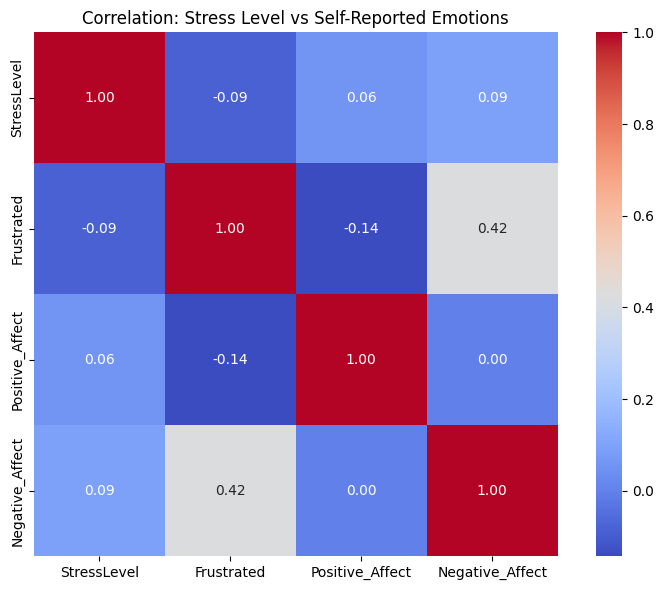

In [69]:
correlations = merged_data[["StressLevel", "Frustrated", "Positive_Feelings", "Negative_Feelings"]].corr()

# Plot a heatmap of the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar=True)
plt.title("Correlation: Stress Level vs Self-Reported Emotions")
plt.tight_layout()
plt.show()

The physiological stress clusters do not strongly align with self-reported feelings of frustration or emotional states !!!

> There was minimal correlation between physiological stress levels and self-reported emotions, suggesting that subjective awareness or willingness to report stress may differ from biometric indicators.

In [70]:
# Step 1: Calculate a combined self-report stress score
# Normalize Frustrated to 0–1 scale (since it ranges 0–10)
merged_data["Frustrated_Norm"] = merged_data["Frustrated"] / 10

# Combine Negative Affect and Frustrated into a "SelfReported_Stress"
merged_data["SelfReported_Stress"] = (merged_data["Negative_Affect"] / 5 + merged_data["Frustrated_Norm"]) / 2

# Step 2: Normalize physiological stress level (already in range 0-2)
merged_data["Physio_Stress"] = merged_data["StressLevel"] / 2

# Step 3: Calculate discrepancy (positive means self-report > physio, negative means the opposite)
merged_data["Stress_Discrepancy"] = merged_data["SelfReported_Stress"] - merged_data["Physio_Stress"]

# Step 4: Categorize individuals into 3 conceptual clusters
def categorize_discrepancy(diff):
    if diff >= 0.2:
        return "Reported more stress than recorded"
    elif diff <= -0.2:
        return "Reported less stress than recorded"
    else:
        return "Reported stress matches bracelet"

merged_data["Stress_Cluster"] = merged_data["Stress_Discrepancy"].apply(categorize_discrepancy)

# Step 5: Count individuals per cluster
stress_cluster_summary = merged_data.groupby("Stress_Cluster")["Individual"].nunique().reset_index(name="Unique Individuals")

print(stress_cluster_summary)

# Show a sample of how individuals are categorized
merged_data[["Individual", "StressLevel", "Negative_Affect", "Frustrated", "SelfReported_Stress", "Physio_Stress", "Stress_Discrepancy", "Stress_Cluster"]].head()

                       Stress_Cluster  Unique Individuals
0  Reported less stress than recorded                   9
1  Reported more stress than recorded                  19
2    Reported stress matches bracelet                  15


,Individual,StressLevel,Negative_Affect,Frustrated,SelfReported_Stress,Physio_Stress,Stress_Discrepancy,Stress_Cluster
0,1,0,1.6,3.0,0.31,0.0,0.31,Reported more stress than recorded
1,1,0,2.2,2.0,0.32,0.0,0.32,Reported more stress than recorded
2,1,0,1.2,0.0,0.12,0.0,0.12,Reported stress matches bracelet
3,1,0,1.8,3.0,0.33,0.0,0.33,Reported more stress than recorded
4,2,0,1.0,0.0,0.10,0.0,0.10,Reported stress matches bracelet


In [76]:
# Filter the group and select only the requested columns
filtered_data = merged_data[merged_data["Stress_Cluster"].str.strip() == "Reported less stress than recorded"]
columns_to_show = [
    "Individual", "StressLevel", "Negative_Affect", 
    "Frustrated", "SelfReported_Stress", 
    "Physio_Stress", "Stress_Discrepancy"
]

# Display the result
filtered_data[columns_to_show]

,Individual,StressLevel,Negative_Affect,Frustrated,SelfReported_Stress,Physio_Stress,Stress_Discrepancy
5,2,1,1.0,1.0,0.15,0.5,-0.35
12,4,1,1.4,1.0,0.19,0.5,-0.31
14,4,1,1.2,0.0,0.12,0.5,-0.38
19,5,1,1.6,1.0,0.21,0.5,-0.29
22,6,1,1.2,1.0,0.17,0.5,-0.33
23,6,1,1.2,1.0,0.17,0.5,-0.33
59,15,1,1.4,2.0,0.24,0.5,-0.26
60,16,1,1.0,1.0,0.15,0.5,-0.35
61,16,1,1.2,2.0,0.22,0.5,-0.28
63,16,1,1.0,1.0,0.15,0.5,-0.35


_____________

________

<span style="color:red">DO NOT RUN PAST THIS POINT</span>

## Get rest baseline per person, per round

In [25]:
# Extract rest data (phases 1 and 3)
rest_data_raw = final_data[final_data["Phase"].isin(["phase1", "phase3"])]

# Compute baseline mean and std per individual and round (raw values)
baseline_raw = rest_data_raw.groupby(["Individual", "Round"])[features].agg(['mean', 'std'])

In [26]:
# Core features to track
core_features = ['HR_TD_Mean', 'EDA_TD_P_Mean', 'TEMP_TD_Mean']

## Check if participants are stressed for each round

In [27]:
# Now get task data from raw dataset
task_data = final_data[final_data["Phase"] == "phase2"]
task_data["is_stressed"] = 0

# Loop to compute z-scores using raw baseline
for idx, row in task_data.iterrows():
    indiv = row["Individual"]
    round_ = row["Round"]

    try:
        means = baseline_raw.loc[(indiv, round_)][(slice(None), 'mean')]
        stds = baseline_raw.loc[(indiv, round_)][(slice(None), 'std')].replace(0, 1e-6)
    except KeyError:
        continue

    row_physio = row[core_features]
    z_scores = (row_physio - means) / stds

    if (z_scores > 4).sum() >= 1:  # Must spike in at least 1 feature
        task_data.at[idx, "is_stressed"] = 1

In [28]:
task_data["is_stressed"].unique

<bound method Series.unique of 1      1
4      0
7      0
10     1
13     0
      ..
298    0
301    0
304    1
307    1
310    0
Name: is_stressed, Length: 104, dtype: int64>

In [29]:
task_data["is_stressed"].value_counts()

0    57
1    47
Name: is_stressed, dtype: int64

In [30]:
print(task_data[task_data["is_stressed"]==1].head())

      Round   Phase  Individual  Puzzler Cohort  HR_TD_Mean  HR_TD_Median  \
1   round_3  phase2           1        1   D1_4   76.540732         76.61   
10  round_1  phase2           1        1   D1_4   73.961289         71.53   
19  round_4  phase2           2        0   D1_4   71.348408         70.23   
31  round_4  phase2           3        1   D1_4   71.107055         69.90   
34  round_1  phase2           3        1   D1_4  103.247233        103.55   

    HR_TD_std  HR_TD_Min  HR_TD_Max  ...  EDA_TD_T_Kurtosis  EDA_TD_T_Skew  \
1    2.584756      69.82      82.33  ...           0.887010       0.854067   
10   5.500071      67.37      87.83  ...          -1.051341       0.618847   
19   6.355799      61.32      81.13  ...          -1.105440       0.093614   
31   5.627870      60.58      81.75  ...          -0.881294       0.802722   
34  10.948894      85.63     127.65  ...          -0.724247      -0.335385   

    EDA_TD_T_Slope_min  EDA_TD_T_Slope_max  EDA_TD_T_Slope_mean  \
1

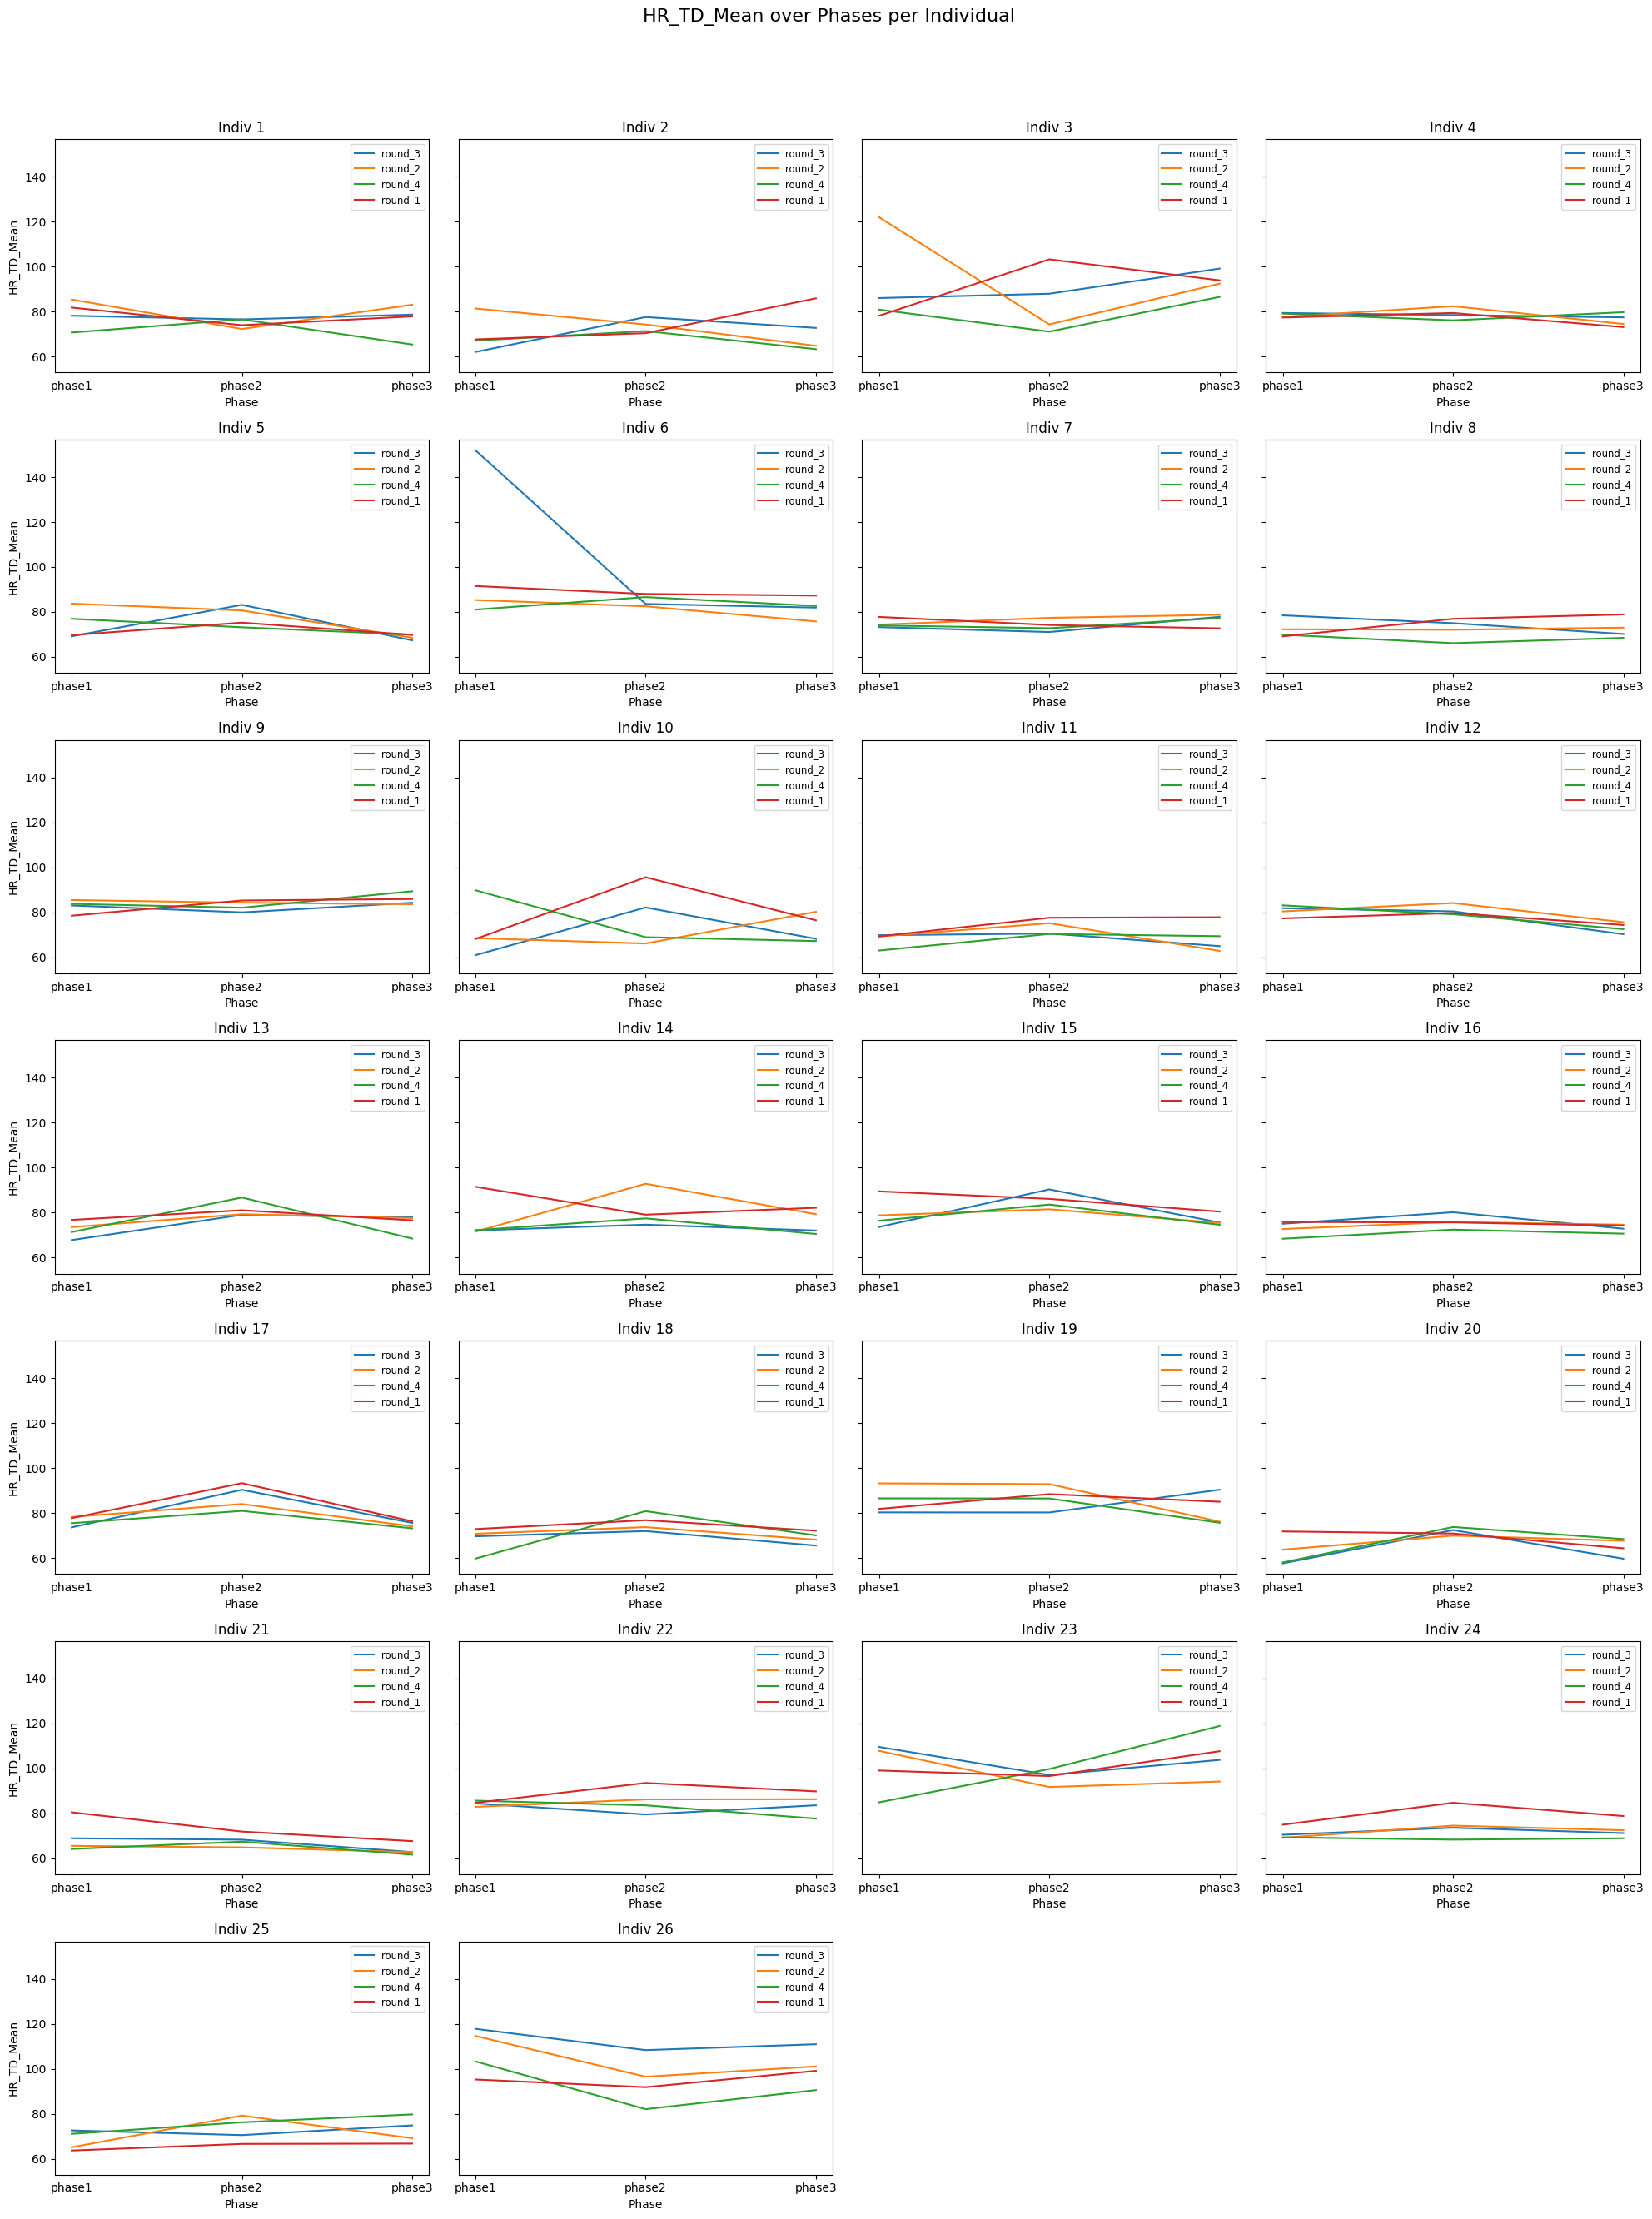

In [31]:
feature = 'HR_TD_Mean'
individuals = data["Individual"].unique()
n_individuals = len(individuals)

# Define ordered phase mapping
phase_to_num = {'phase1': 1, 'phase2': 2, 'phase3': 3}

# Set up grid size for subplots
cols = 4
rows = (n_individuals + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharey=True)

for i, indiv in enumerate(individuals):
    ax = axes[i // cols, i % cols]
    indiv_data = data[data["Individual"] == indiv]

    for round_ in indiv_data["Round"].unique():
        round_data = indiv_data[indiv_data["Round"] == round_].copy()
        # Map phase to numerical order
        round_data["Phase_num"] = round_data["Phase"].map(phase_to_num)
        # Sort to ensure correct order
        round_data = round_data.sort_values("Phase_num")
        ax.plot(round_data["Phase_num"], round_data[feature], label=round_)

    ax.set_title(f"Indiv {indiv}")
    ax.set_xlabel("Phase")
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(['phase1', 'phase2', 'phase3'])

    if i % cols == 0:
        ax.set_ylabel("HR_TD_Mean")

    ax.legend(fontsize='small')

# Hide unused subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

fig.suptitle(f"{feature} over Phases per Individual", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

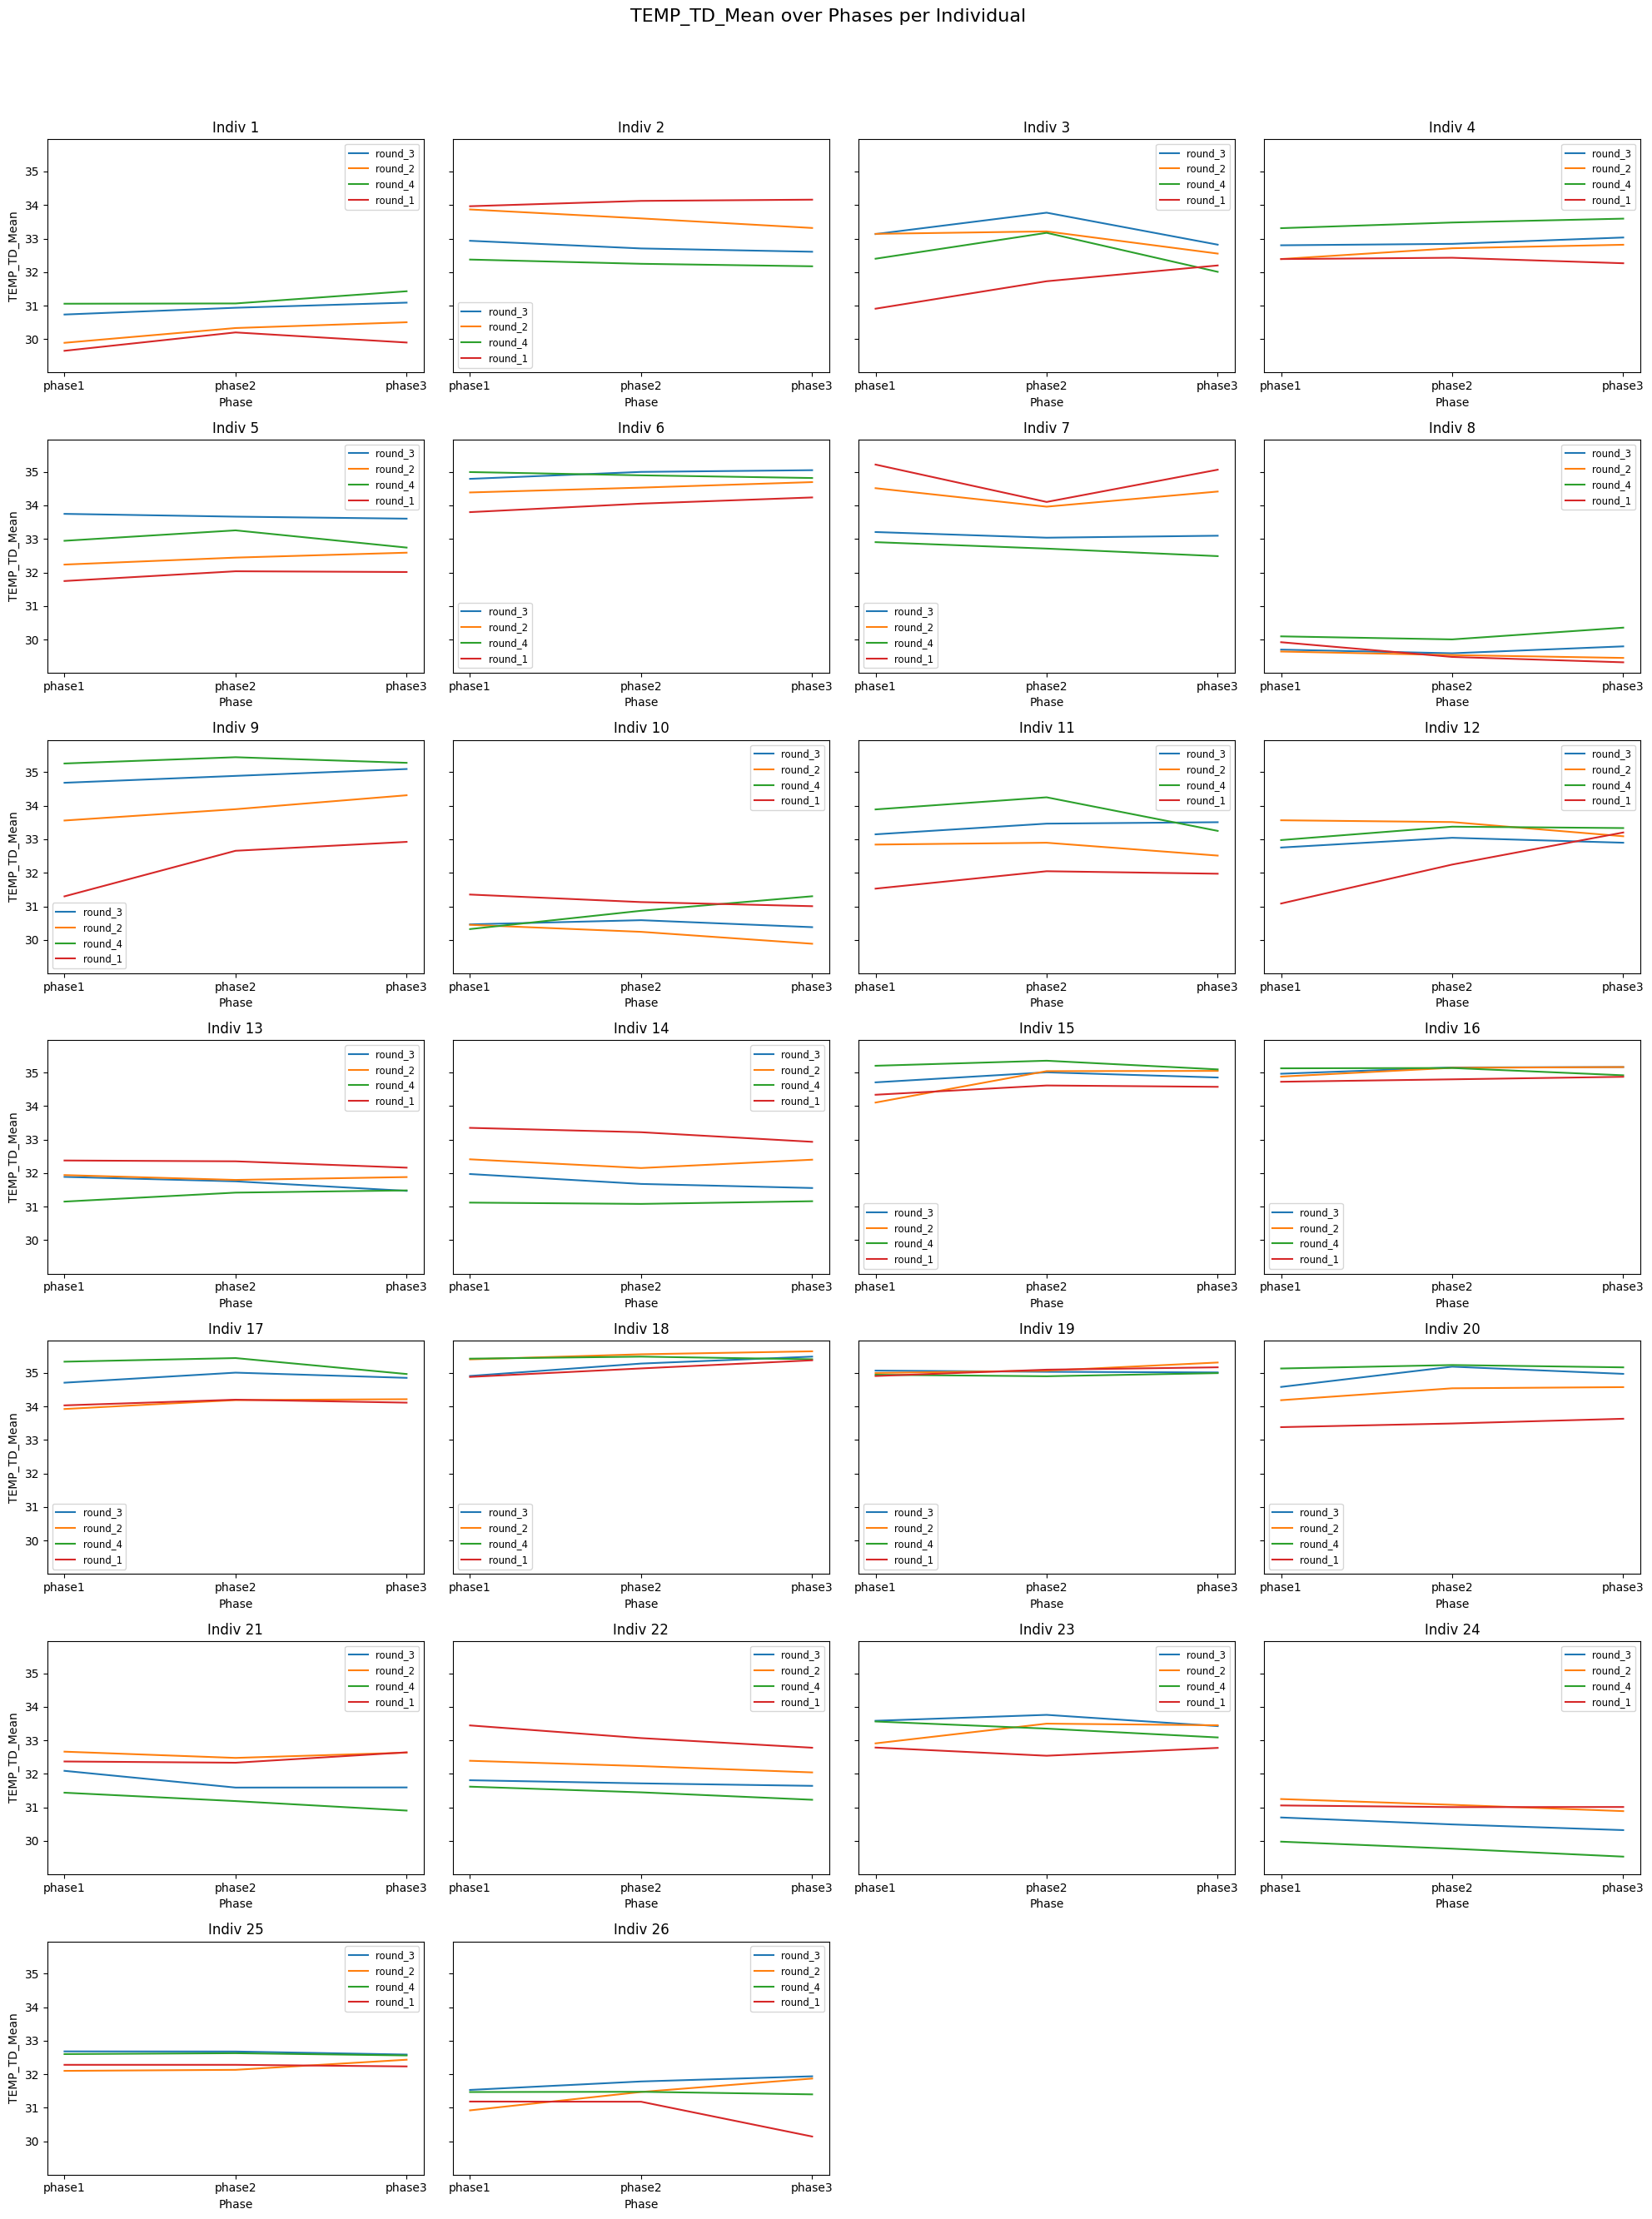

In [43]:
feature = 'TEMP_TD_Mean'
individuals = data["Individual"].unique()
n_individuals = len(individuals)

# Define ordered phase mapping
phase_to_num = {'phase1': 1, 'phase2': 2, 'phase3': 3}

# Set up grid size for subplots
cols = 4
rows = (n_individuals + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharey=True)

for i, indiv in enumerate(individuals):
    ax = axes[i // cols, i % cols]
    indiv_data = data[data["Individual"] == indiv]

    for round_ in indiv_data["Round"].unique():
        round_data = indiv_data[indiv_data["Round"] == round_].copy()
        # Map phase to numerical order
        round_data["Phase_num"] = round_data["Phase"].map(phase_to_num)
        # Sort to ensure correct order
        round_data = round_data.sort_values("Phase_num")
        ax.plot(round_data["Phase_num"], round_data[feature], label=round_)

    ax.set_title(f"Indiv {indiv}")
    ax.set_xlabel("Phase")
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(['phase1', 'phase2', 'phase3'])

    if i % cols == 0:
        ax.set_ylabel("TEMP_TD_Mean")

    ax.legend(fontsize='small')

# Hide unused subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

fig.suptitle(f"{feature} over Phases per Individual", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

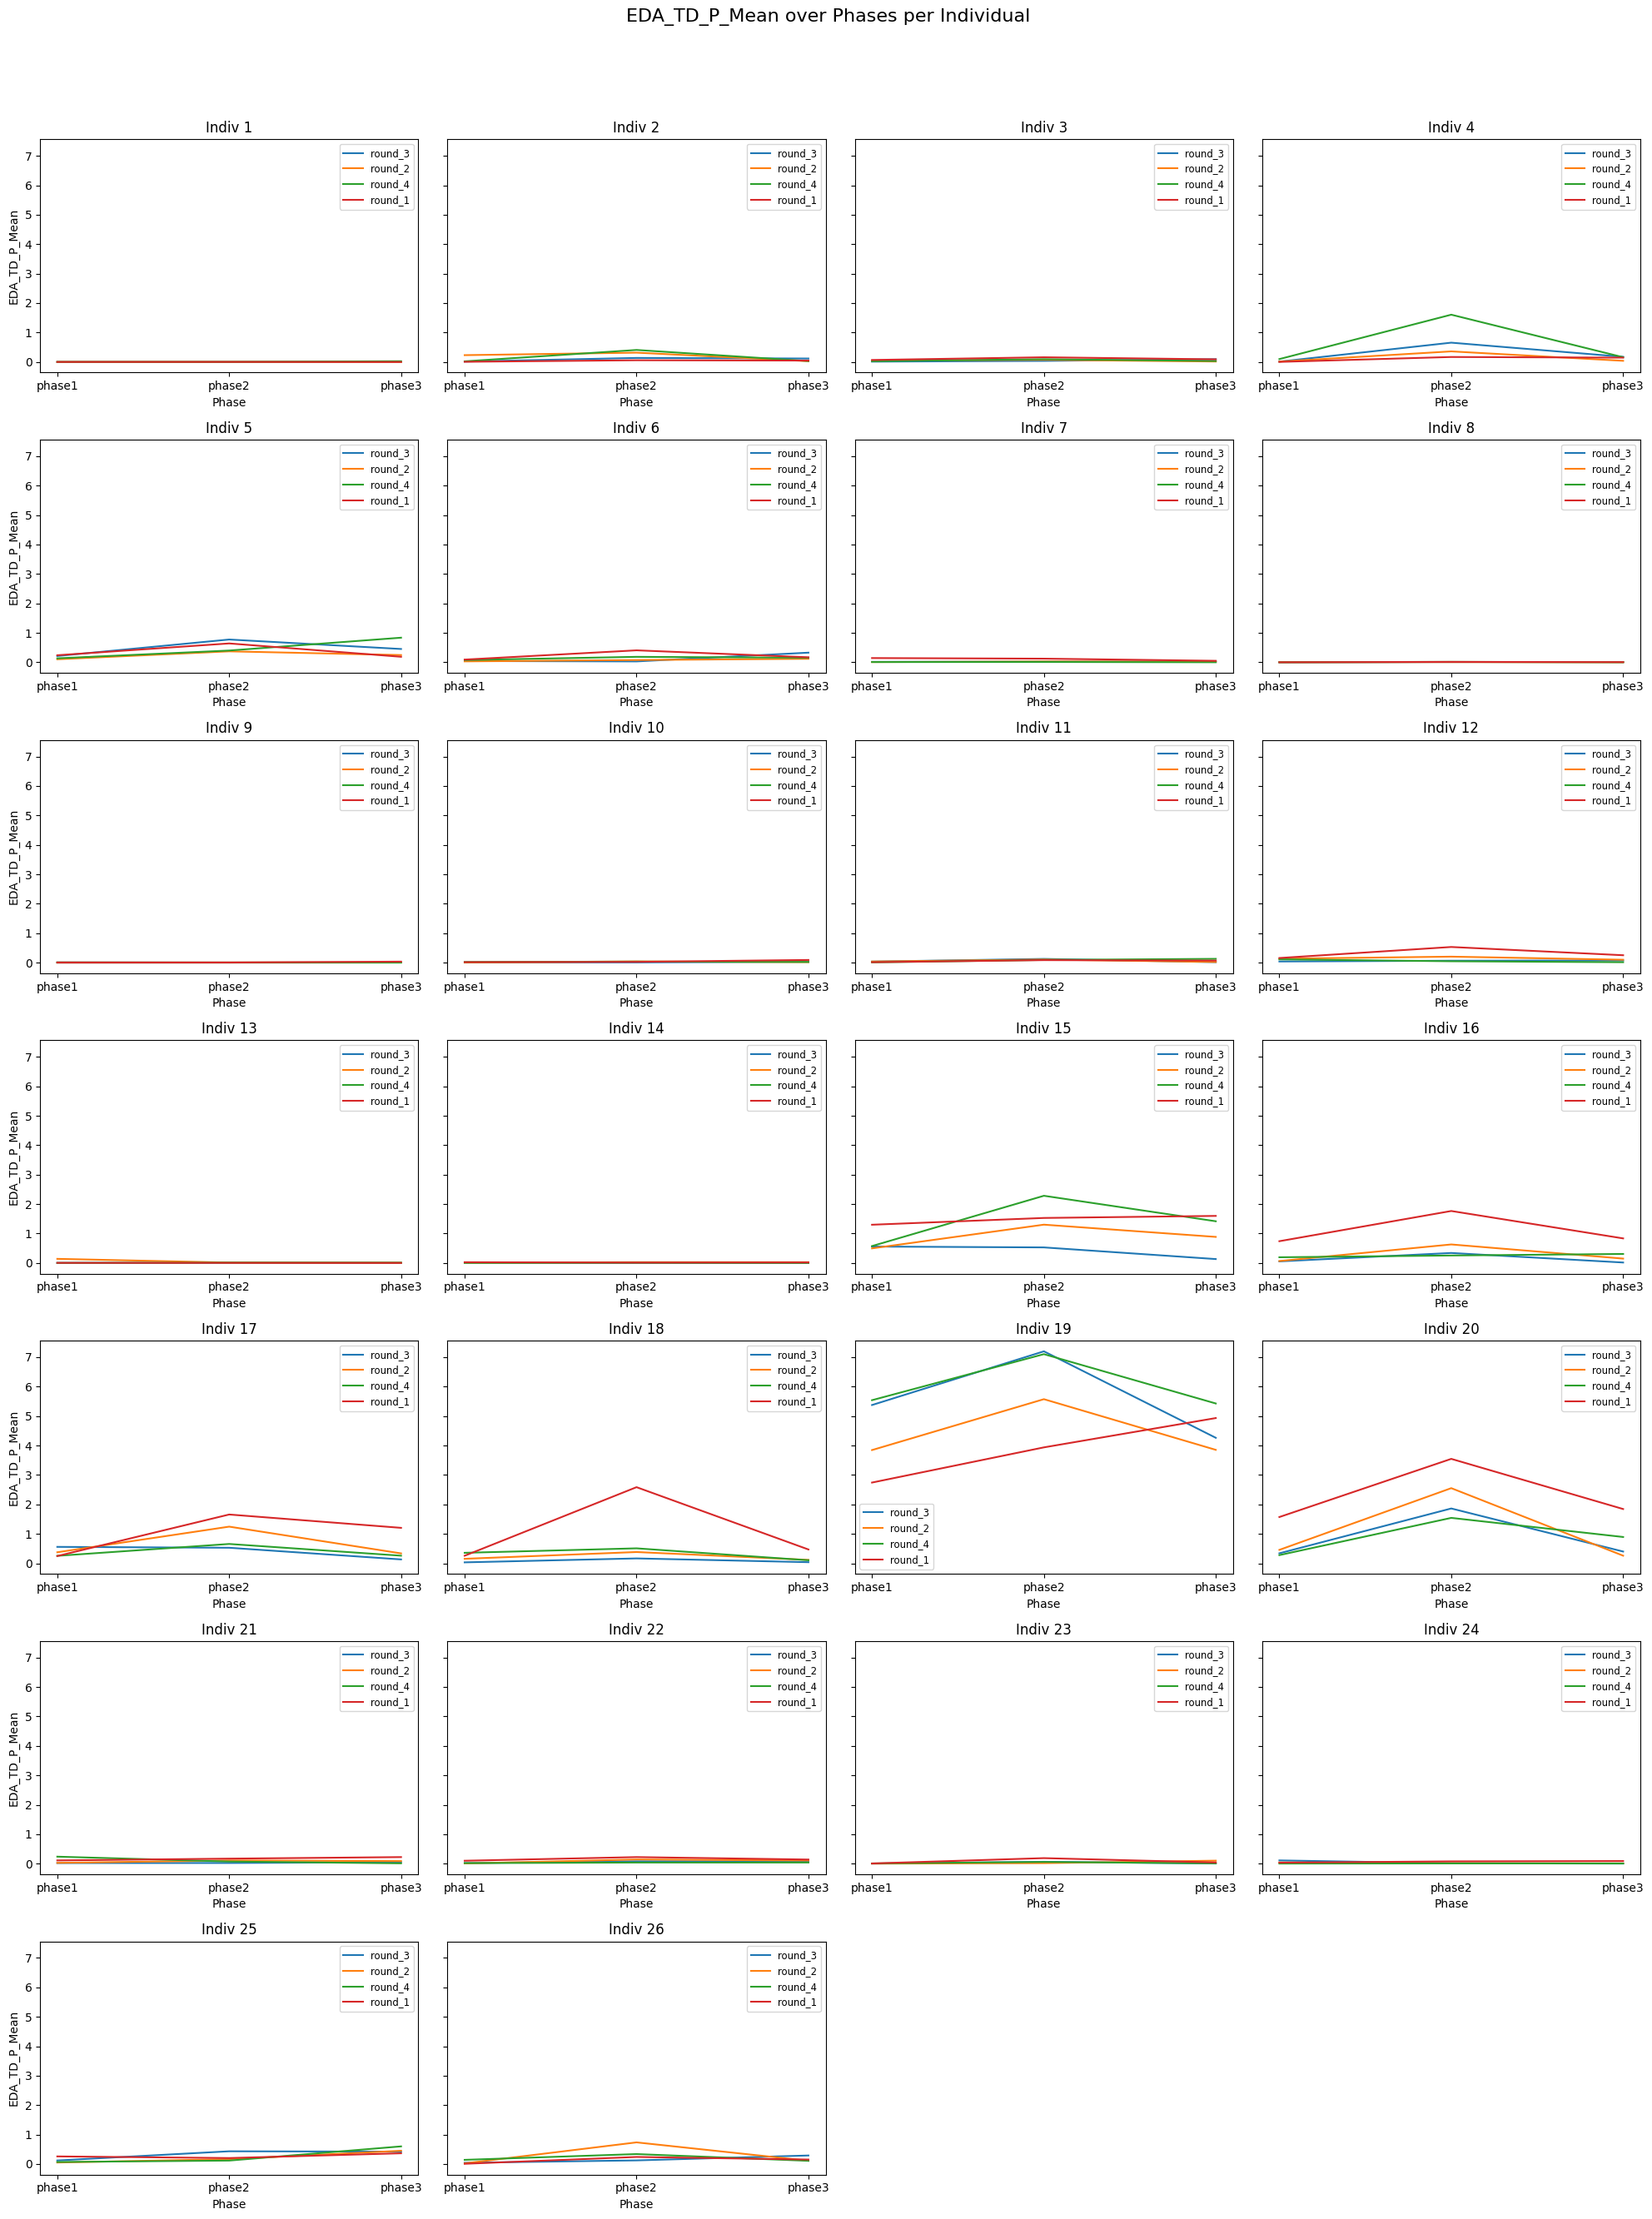

In [33]:
feature = 'EDA_TD_P_Mean'
individuals = data["Individual"].unique()
n_individuals = len(individuals)

# Define ordered phase mapping
phase_to_num = {'phase1': 1, 'phase2': 2, 'phase3': 3}

# Set up grid size for subplots
cols = 4
rows = (n_individuals + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharey=True)

for i, indiv in enumerate(individuals):
    ax = axes[i // cols, i % cols]
    indiv_data = data[data["Individual"] == indiv]

    for round_ in indiv_data["Round"].unique():
        round_data = indiv_data[indiv_data["Round"] == round_].copy()
        # Map phase to numerical order
        round_data["Phase_num"] = round_data["Phase"].map(phase_to_num)
        # Sort to ensure correct order
        round_data = round_data.sort_values("Phase_num")
        ax.plot(round_data["Phase_num"], round_data[feature], label=round_)

    ax.set_title(f"Indiv {indiv}")
    ax.set_xlabel("Phase")
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(['phase1', 'phase2', 'phase3'])

    if i % cols == 0:
        ax.set_ylabel("EDA_TD_P_Mean")

    ax.legend(fontsize='small')

# Hide unused subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

fig.suptitle(f"{feature} over Phases per Individual", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()